yaxint2

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy import stats

import seaborn as sns
# %matplotlib notebook
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler

In [3]:
app = pd.read_csv("applicants.csv")

In [4]:
mat = app.drop(['SUIT','ID'],axis=1)
matrix = mat.iloc[:, :46]
classes = app.iloc[:, 15].values
matrix.head()

,FL,APP,AA,LA,SC,LC,HON,SMS,EXP,DRV,AMB,GSP,POT,KJ
0,6,7,2,5,8,7,8,8,3,8,9,7,5,7
1,9,10,5,8,10,9,9,10,5,9,9,8,8,8
2,7,8,3,6,9,8,9,7,4,9,9,8,6,8
3,5,6,8,5,6,5,9,2,8,4,5,8,7,6
4,6,8,8,8,4,4,9,5,8,5,5,8,8,7


#### a. Find correlation (R) and covariance (∑̂)matrix of the applicant dataset


In [5]:
cov_matrix = np.cov(matrix.T)
corr_matrix = np.corrcoef(matrix.T)
# cov_matrix

#### b.Should principal component analysis be performed on the covariance or the correlation matrix? Explain your choice.

Since the covariance matrix usually used when the variable scales are similar and the correlation matrix is suedwhen variables are on different scales.



#### c.Find the eigen values and eigen vectors of both R and ∑̂. Show that all pairs of eigen vectors are orthogonal to one another

In [6]:
cov_eig_vals, cov_eig_vecs = np.linalg.eig(cov_matrix)
corr_eig_vals, corr_eig_vecs = np.linalg.eig(corr_matrix)
corr_eig_vals

array([ 7.03447534,  1.76516139,  1.35447166,  1.12619877,  0.78177132,
        0.51056337,  0.38076129,  0.30647557,  0.22272887,  0.18399344,
        0.03810695,  0.118359  ,  0.07833862,  0.0985944 ])

In [7]:
cov_eig_vals

array([ 55.99667564,  11.57897898,   7.55201909,   6.95018513,
         3.82315781,   3.39624304,   2.8334446 ,   2.03442456,
         1.55658635,   0.28181674,   1.22370184,   0.53315988,
         0.84110516,   0.77289732])

In [8]:
cov_transpose = cov_matrix.transpose()
if (cov_transpose.any() == cov_matrix.any()):
    print("Yes, since matrix's transpose is same as original matrix, this matrix is real symmetric matrix with distint eigenvalues. From real symmetric matrix's property, eigenvectors corresponding to distinct eigenvalues are orthogonal.")

Yes, since matrix's transpose is same as original matrix, this matrix is real symmetric matrix with distint eigenvalues. From real symmetric matrix's property, eigenvectors corresponding to distinct eigenvalues are orthogonal.


In [9]:
corr_transpose = corr_matrix.transpose()
if (corr_transpose.any() == corr_matrix.any()):
    print("Yes,since matrix's transpose is same as original matrix, this matrix is real symmetric matrix with distint eigenvalues. From real symmetric matrix's property, eigenvectors corresponding to distinct eigenvalues are orthogonal.")

Yes,since matrix's transpose is same as original matrix, this matrix is real symmetric matrix with distint eigenvalues. From real symmetric matrix's property, eigenvectors corresponding to distinct eigenvalues are orthogonal.


#### d. Show that sum of the eigen values of  ∑̂ is equal to the trace of  ∑̂ 


In [10]:
sumofeigen = 0
trace = 0
for i in range(len(cov_eig_vals)):
    sumofeigen+= cov_eig_vals[i]
    trace+= cov_matrix[i][i]
print("Sum of the eigen values is,", sumofeigen, "and trace is,", trace,"Are they equal? Yes")

Sum of the eigen values is, 99.3743961353 and trace is, 99.3743961353 Are they equal? Yes


#### e. Run PCA analysis on the dataset based on your choice in part 2.b. 
i.How many principal components are required to describe the space in which the data actually falls? 

ii.Show the scree plot for your PCA analysis

iii.Plot the first principal component against the second principal component and include an interpretation 

iv.Explain the benefits of running PCA analysis on this dataset

##### i.How many principal components are required to describe the space in which the data actually falls? 

In [11]:
print("In order to choose how many principal components we need, we need to choose the largest the eigenvalues, since the less the eigenvalues, it gives us the less the information we need.")

In order to choose how many principal components we need, we need to choose the largest the eigenvalues, since the less the eigenvalues, it gives us the less the information we need.


In [12]:
total = sum(cov_eig_vals)
var_exp = [(i / total)*100 for i in sorted(cov_eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  56.3491984 ,   68.00107195,   75.60063419,   82.59457368,
         86.44179989,   89.85942371,   92.71070604,   94.75793816,
         96.32432389,   97.55572944,   98.40212972,   99.17989276,
         99.7164091 ,  100.        ])

In [13]:
print("Since I want the amount of explained variance explains 70 to 80% of the variance at least, here I would like to choose 3 principal components")

Since I want the amount of explained variance explains 70 to 80% of the variance at least, here I would like to choose 3 principal components


##### ii.Show the scree plot for your PCA analysis

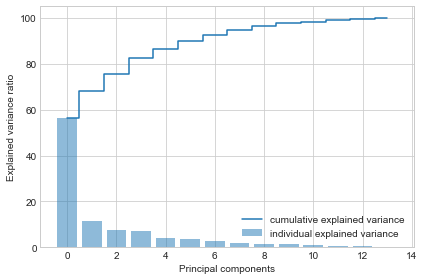

In [14]:

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(14), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(14), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [15]:
print("Since I want the amount of explained variance explains 70 to 80% of the variance at least, here I would like to choose 3 or 4 principal components")

Since I want the amount of explained variance explains 70 to 80% of the variance at least, here I would like to choose 3 or 4 principal components


##### iii.Plot the first principal component against the second principal component and include an interpretation 

In [16]:
eig_pairs = [(np.abs(cov_eig_vals[i]), cov_eig_vecs[:,i]) for i in range(len(cov_eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)



In [17]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(14,1),
                      -eig_pairs[1][1].reshape(14,1)))
print(matrix_w)
m = matrix.values
Y = m.dot(matrix_w)
# print(Y)
classes

[[ 0.21892761  0.37650244]
 [ 0.13024625  0.0133546 ]
 [ 0.04777181 -0.02970922]
 [ 0.17083567  0.49651942]
 [ 0.22182748 -0.278704  ]
 [ 0.34765868 -0.21857609]
 [ 0.06360692  0.22041246]
 [ 0.39972639 -0.29106107]
 [ 0.25339158  0.4121855 ]
 [ 0.32683295 -0.07138858]
 [ 0.3127551  -0.23809814]
 [ 0.35295037 -0.06929126]
 [ 0.36461627  0.05652294]
 [ 0.20827102  0.33499806]]


array([10, 10, 10,  5,  7,  6, 10, 10, 10, 10,  5,  7,  8,  6,  6, 10,  8,
        4,  4,  9,  8,  8,  8,  8,  4,  6,  5,  0,  0,  3,  3,  2,  2,  2,
        3,  3,  2,  2, 10, 10,  8,  5,  5,  4,  0,  0], dtype=int64)

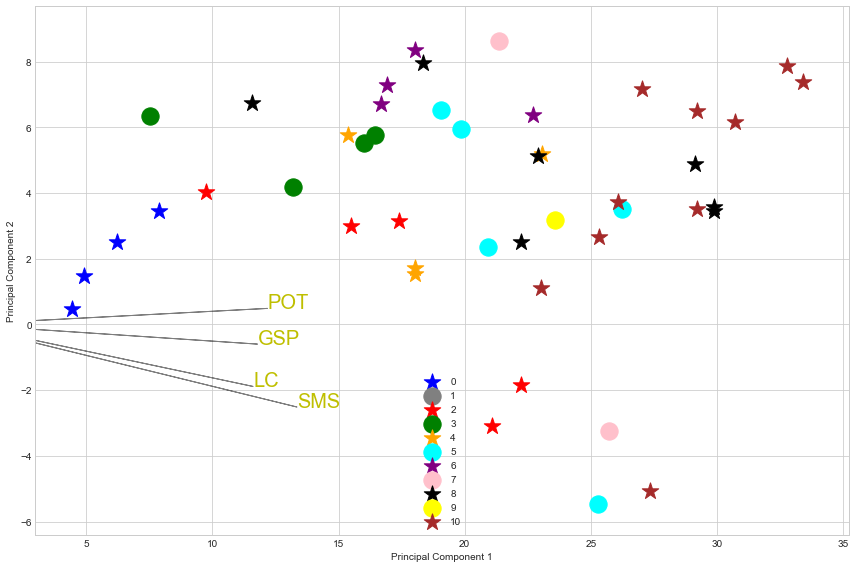

In [65]:
lst = ['*','o','*','o','*','o','*','o','*','o','*']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for  lab, col in zip(range(11),
                        ('blue', 'gray','red', 'green', 'orange', 'cyan', 'purple', 'pink', 'black','yellow', 'brown')):
        plt.scatter(Y[classes == lab,0],
                    Y[classes == lab,1],
                    label=lab,
                    c=col, s =300, marker = lst[lab])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
#     plt.show()
    for i in range(len(cov_eig_vecs)):
        # arrows project features (ie columns from csv) as vectors onto PC axes
        if ( float(cov_eig_vecs[i,0]*max(Y[:,0]))**2 + float(-cov_eig_vecs[i,1]*max(Y[:,1]))**2 ) > 120:
            plt.arrow(0, 0, float(cov_eig_vecs[i,0]*max(Y[:,0])), float(-cov_eig_vecs[i,1]*max(Y[:,1])),
                 alpha=0.5, color='black', width=0.0005, head_width=0.0025)
            plt.text(float(cov_eig_vecs[i,0]*max(Y[:,0])), float(-cov_eig_vecs[i,1]*max(Y[:,1])),
                 (matrix.columns.values)[i], color='y',fontsize=20)
    
    plt.show()

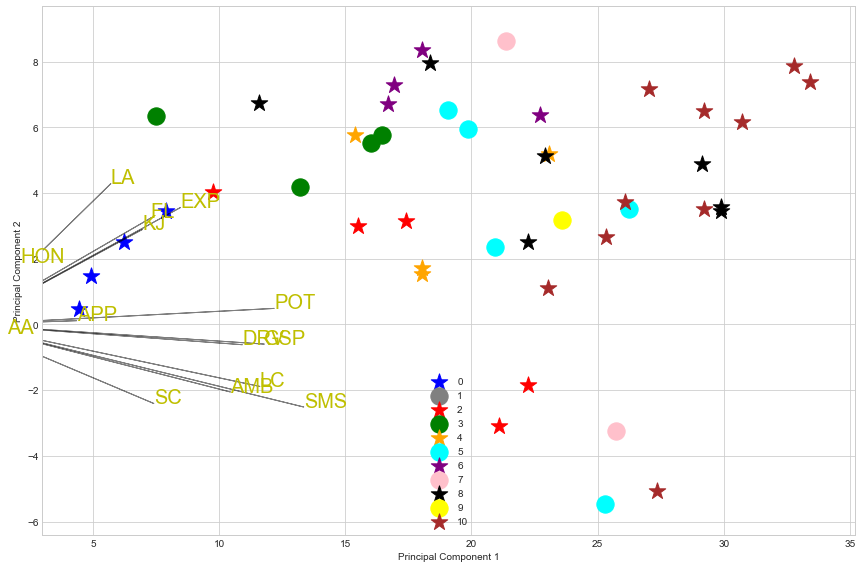

In [67]:
lst = ['*','o','*','o','*','o','*','o','*','o','*']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for  lab, col in zip(range(11),
                        ('blue', 'gray','red', 'green', 'orange', 'cyan', 'purple', 'pink', 'black','yellow', 'brown')):
        plt.scatter(Y[classes == lab,0],
                    Y[classes == lab,1],
                    label=lab,
                    c=col, s =300, marker = lst[lab])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
#     plt.show()
    for i in range(len(cov_eig_vecs)):
        # arrows project features (ie columns from csv) as vectors onto PC axes
        if ( float(cov_eig_vecs[i,0]*max(Y[:,0]))**2 + float(-cov_eig_vecs[i,1]*max(Y[:,1]))**2 ) > 0:
            plt.arrow(0, 0, float(cov_eig_vecs[i,0]*max(Y[:,0])), float(-cov_eig_vecs[i,1]*max(Y[:,1])),
                 alpha=0.5, color='black', width=0.0005, head_width=0.0025)
            plt.text(float(cov_eig_vecs[i,0]*max(Y[:,0])), float(-cov_eig_vecs[i,1]*max(Y[:,1])),
                 (matrix.columns.values)[i], color='y',fontsize=20)
    
    plt.show()

#### Answer:
Interpretation of the principal components is based on finding which variables are most strongly correlated with 
each component, since POT and SMS are large in magnitude over all other variables, they corelated with principal component 1 the most. After change the limitation of the vectors magitude, we can see that GSP and LC also highly correlated with princial Component 1. If we look at principal component 2,we will find out that LA has the largest magnitude over all, so LA is highly correlated to principal component 2. However, since we need 3 or 4 component to cover 80%of the variance, multidimensional scatter plot would reveal more informations and classify the data more specficantly. 

##### iv.Explain the benefits of running PCA analysis on this dataset

PCA reduce the dimension of the data we are anlyzed, since only a few variance is usefull, reduce the dimension will help us to only focus on compenonets that have enough variance. Also since this dataset has same scale for all data, it is easier to perform PCA on this dataset and the variances will be relatively similar. 